# Validation of ERA5 fluxes

In [117]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import pandas as pd
import numpy as np
import glob
import metview as mv
import xarray as xr
execfile("utils.py")
%matplotlib inline

colorpal=["midnightblue","mediumblue","green","greenyellow","yellow",
         "gold","orange","red","darkorchid","darkviolet","blueviolet","indigo"]

In [8]:
#model data directory
dir="/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/"
files=np.sort(glob.glob(dir+"/*"))

#obs data
dir_obs="/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/ICOS_FLUXNET/2020/"

#meta data ICOS stations 2020
meta=np.loadtxt("/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/station_info/ICOS_FLUXNET/station_coords_2020",
                str, comments="%", skiprows=1)
meta

array([['BE-Bra', '51.30761', '4.51984', '16', 'Cfb', '3'],
       ['BE-Vie', '50.304962', '5.998099', '490', 'Cfb', '18'],
       ['DE-Tha', '50.96256', '13.56515', '380', 'Cfb', '3'],
       ['DK-Sor', '55.48587', '11.644645', '40', 'Cfb', '5'],
       ['FI-Hyy', '61.84741', '24.29477', '181', 'Dfc', '3'],
       ['CH-Dav', '46.81533', '9.85591', '1689', 'Dfc', '3'],
       ['RU-Fyo', '56.461528', '32.922083', '274', 'Dfc', '3'],
       ['IT-Ren', '46.58686', '11.43369', '1735', 'Dfc', '3'],
       ['DE-Hai', '51.079407', '10.452089', '438', 'Dfb', '6'],
       ['IL-Yat', '31.345045', '35.051989', '657', 'Dfb', '6'],
       ['DE-Geb', '51.09973', '10.91463', '161', 'Cfb', '1'],
       ['SE-Deg', '64.18203', '19.55654', '270', 'Dfc', '13'],
       ['IT-Lav', '45.9562', '11.28132', '1355', 'Dfc', '3'],
       ['BE-Lon', '50.55162', '4.746234', '170', 'Cfb', '1'],
       ['CH-Lae', '47.47808', '8.365', '689', 'Dfc', '3'],
       ['CH-Oe2', '47.28631', '7.73433', '452', 'Dfb', '1'],
    

## Validation at one station

In [3]:
#select station from above's meta data file
idx=50
meta_station=meta[idx,]
meta_station

array(['FR-Hes', '48.6741', '7.06465', '310', 'Cfb', '5'], dtype='<U9')

In [24]:
#observational data at selected station
lat=float(meta_station[1])
lon=float(meta_station[2])
coords=[lat,lon]
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(lat,4))+"*"+str(round(lon,4))+"*")
dat=pd.read_pickle(f[0])
sh_obs=dat["H_CORR"]
lh_obs=dat["LE_CORR"]

### Comparison of mean diurnal cycle per month at one station: model vs obs

month: 1	 offset to utc is: 1	 storage offset is: 6
month: 2	 offset to utc is: 1	 storage offset is: 6
month: 3	 offset to utc is: 1	 storage offset is: 6
month: 4	 offset to utc is: 2	 storage offset is: 6
month: 5	 offset to utc is: 2	 storage offset is: 6
month: 6	 offset to utc is: 2	 storage offset is: 6
month: 7	 offset to utc is: 2	 storage offset is: 6
month: 8	 offset to utc is: 2	 storage offset is: 6
month: 9	 offset to utc is: 2	 storage offset is: 6
month: 10	 offset to utc is: 2	 storage offset is: 6
month: 11	 offset to utc is: 1	 storage offset is: 6
month: 12	 offset to utc is: 1	 storage offset is: 6


Text(0.5, 1.0, 'SH: mean diurnal cycle per month @ FR-Hes')

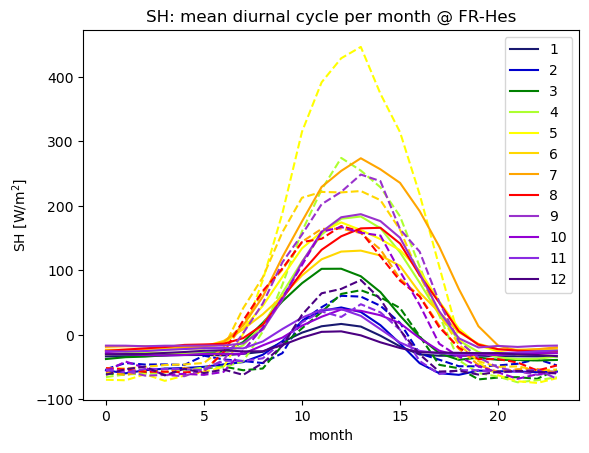

In [30]:
#model data
monlen=[31,29,28,30,31,30,31,31,30,24,30,31]
for i in range(12): #every month
    tmp=mv.read(files[i])
    sh_all=tmp["sshf"]
    lh_all=tmp["slhf"]
    sh_coord=np.array(sh_all.nearest_gridpoint(coords))/3600*-1
    lh_coord=np.array(lh_all.nearest_gridpoint(coords))/3600*-1
    sh_coord=sh_coord[sh_coord!=0]
    lh_coord=lh_coord[lh_coord!=0]
    sh_coord=sh_coord[:monlen[i]*24]
    lh_coord=lh_coord[:monlen[i]*24]
    times = mv.valid_date(sh_all)
    storage_off=times[0].hour #offset due to storage of model data
    if i<9: #determine time offset of utc vs lt
        date="2020-0"+str(i+1)+"-01 00:00:00"
    else: 
        date="2020-"+str(i+1)+"-01 00:00:00"
    time_off=utc_offset(lat,lon,date)
    print("month: "+str(i+1)+"\t offset to utc is: "+str(time_off)+"\t storage offset is: "+str(storage_off))
    plt.plot(mean_diurnal_cycle(sh_coord[24-storage_off-time_off::]),label=str(i+1),color=colorpal[i])
    #add measurements
    plt.plot(mean_diurnal_cycle(sh_obs[sum(monlen[:i-1])*48:sum(monlen[:i])*48:2]),"--",color=colorpal[i])
    
    
plt.legend()
plt.xlabel("month")
plt.ylabel(r"SH [W/m$^2$]")
plt.title("SH: mean diurnal cycle per month @ "+str(meta[idx,0]))

Check for another station with a larger offset to UTC:

month: 3	 offset to utc is: 2	 storage offset is: 6
month: 8	 offset to utc is: 3	 storage offset is: 6
month: 10	 offset to utc is: 3	 storage offset is: 6


Text(0.5, 1.0, 'SH: mean diurnal cycle per month @ FI-Var')

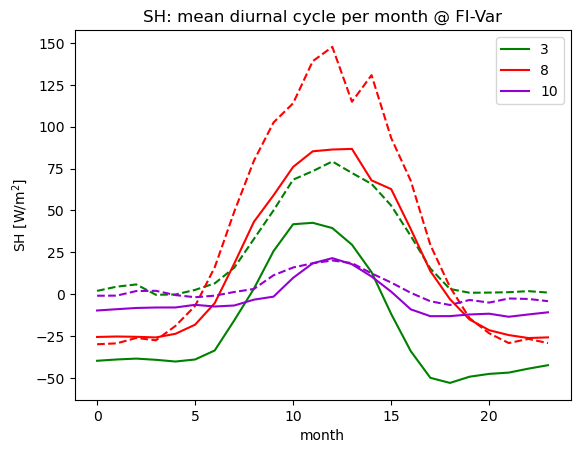

In [38]:
#select station from above's meta data file
idx=60 #FI-Var
meta_station=meta[idx,]
meta_station

#observational data at selected station
lat=float(meta_station[1])
lon=float(meta_station[2])
coords=[lat,lon]
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(lat,4))+"*"+str(round(lon,4))+"*")
dat=pd.read_pickle(f[0])
sh_obs=dat["H_CORR"]
lh_obs=dat["LE_CORR"]

#model data
monlen=[31,29,28,30,31,30,31,31,30,24,30,31]
for i in [2,7,9]: #select month(s)
    tmp=mv.read(files[i])
    sh_all=tmp["sshf"]
    lh_all=tmp["slhf"]
    sh_coord=np.array(sh_all.nearest_gridpoint(coords))/3600*-1
    lh_coord=np.array(lh_all.nearest_gridpoint(coords))/3600*-1
    sh_coord=sh_coord[sh_coord!=0]
    lh_coord=lh_coord[lh_coord!=0]
    sh_coord=sh_coord[:monlen[i]*24]
    lh_coord=lh_coord[:monlen[i]*24]
    times = mv.valid_date(sh_all)
    storage_off=times[0].hour #offset due to storage of model data
    if i<9: #determine time offset of utc vs lt
        date="2020-0"+str(i+1)+"-01 00:00:00"
    else: 
        date="2020-"+str(i+1)+"-01 00:00:00"
    time_off=utc_offset(lat,lon,date)
    print("month: "+str(i+1)+"\t offset to utc is: "+str(time_off)+"\t storage offset is: "+str(storage_off))
    plt.plot(mean_diurnal_cycle(sh_coord[24-storage_off-time_off::]),label=str(i+1),color=colorpal[i])
    #add measurements
    plt.plot(mean_diurnal_cycle(sh_obs[sum(monlen[:i])*48:sum(monlen[:i+1])*48:2]),"--",color=colorpal[i])
    
    
plt.legend()
plt.xlabel("month")
plt.ylabel(r"SH [W/m$^2$]")
plt.title("SH: mean diurnal cycle per month @ "+str(meta[idx,0]))

## Validating all stations

In [43]:
nstations=np.shape(meta)[0]
#sh
sh_obs_av=np.empty((12,24,nstations))
sh_mod_av=np.empty((12,24,nstations))
sh_cors=np.empty((12,24,nstations))
sh_bias=np.empty((12,24,nstations))
sh_rmse=np.empty((12,24,nstations))
#lh
lh_obs_av=np.empty((12,24,nstations))
lh_mod_av=np.empty((12,24,nstations))
lh_cors=np.empty((12,24,nstations))
lh_bias=np.empty((12,24,nstations))
lh_rmse=np.empty((12,24,nstations))

In [104]:
#validation loop over month and stations and hours
monlen=[31,29,28,30,31,30,31,31,30,24,30,31]
for i in range(12): #select month(s)
    print("month: "+ str(i+1))
    #model data fields (stored per month)
    tmp=mv.read(files[i])
    sh_all=tmp["sshf"]
    lh_all=tmp["slhf"]
    times = mv.valid_date(sh_all)
    storage_off=times[0].hour #offset due to storage of model data
    for j in range(nstations): #range(nstations):
        #observational data at current station
        meta_station=meta[j,]
        print("station #"+str(j)+" "+meta_station[0])
        lat=float(meta_station[1])
        lon=float(meta_station[2])
        coords=[lat,lon]
        try:
            f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(lat,4))+"*"+str(round(lon,4))+"*")
            dat=pd.read_pickle(f[0])
            sh_obs=dat["H_CORR"]
            lh_obs=dat["LE_CORR"]
            sh_obs=sh_obs[sum(monlen[:i])*48:sum(monlen[:i+1])*48:2] #cut month
            lh_obs=lh_obs[sum(monlen[:i])*48:sum(monlen[:i+1])*48:2]
            #model timeseries closest to station
            sh_mod=np.array(sh_all.nearest_gridpoint(coords))/3600*-1
            lh_mod=np.array(lh_all.nearest_gridpoint(coords))/3600*-1
            sh_mod=sh_mod[sh_mod!=0] #remove artificial zeros
            lh_mod=lh_mod[lh_mod!=0]
            sh_mod=sh_mod[:monlen[i]*24] #cut month
            lh_mod=lh_mod[:monlen[i]*24]
            if i<9: #determine time offset utc vs lt
                date="2020-0"+str(i+1)+"-01 00:00:00"
            else: 
                date="2020-"+str(i+1)+"-01 00:00:00"
            time_off=utc_offset(lat,lon,date)
            off=24-time_off-storage_off
            for k in range(24):
                nl=len(sh_obs)
                sh_mod_av[i,k,j]=np.nanmean(sh_mod[off+k::24])
                sh_obs_av[i,k,j]=np.nanmean(sh_obs[k::24])
                sh_cors[i,k,j]=np.corrcoef(sh_mod[off+k::24],sh_obs[k:nl-off:24])[0,1]
                sh_bias[i,k,j]=np.nanmean(sh_mod[off+k::24]-sh_obs[k:nl-off:24])
                sh_rmse[i,k,j]=np.sqrt(np.nanmean(sh_mod[off+k::24]-sh_obs[k:nl-off:24])**2)
                lh_mod_av[i,k,j]=np.nanmean(lh_mod[off+k::24])
                lh_obs_av[i,k,j]=np.nanmean(lh_obs[k::24])
                lh_cors[i,k,j]=np.corrcoef(lh_mod[off+k::24],lh_obs[k:nl-off:24])[0,1]
                lh_bias[i,k,j]=np.nanmean(lh_mod[off+k::24]-lh_obs[k:nl-off:24])
                lh_rmse[i,k,j]=np.sqrt(np.nanmean(lh_mod[off+k::24]-lh_obs[k:nl-off:24])**2)
        except:
            continue
            

month: 1
station #0 BE-Bra
station #1 BE-Vie
station #2 DE-Tha
station #3 DK-Sor
station #4 FI-Hyy
station #5 CH-Dav
station #6 RU-Fyo
station #7 IT-Ren
station #8 DE-Hai
station #9 IL-Yat
station #10 DE-Geb
station #11 SE-Deg
station #12 IT-Lav
station #13 BE-Lon
station #14 CH-Lae
station #15 CH-Oe2
station #16 CZ-BK1
station #17 DE-Gri
station #18 DE-Kli
station #19 ES-LJu
station #20 FR-Gri
station #21 GF-Guy
station #22 IT-BCi
station #23 CH-Cha
station #24 CH-Fru
station #25 FR-Aur
station #26 FR-Fon
station #27 FR-Lam
station #28 CH-Aws
station #29 CZ-Wet
station #30 ES-Agu
station #31 DE-Obe
station #32 FR-Fbn
station #33 IT-Tor
station #34 DE-Akm
station #35 FI-Let
station #36 CZ-Stb
station #37 DE-Hzd
station #38 BE-Dor
station #39 DE-RuR
station #40 DE-RuS
station #41 CZ-RAJ
station #42 DE-RuW
station #43 IT-cp2
station #44 IT-SR2
station #45 CZ-KrP
station #46 ES-Cnd
station #47 ES-LM1
station #48 ES-LM2
station #49 FR-Bil
station #50 FR-Hes
station #51 SE-Ros
station #52 S

station #6 RU-Fyo
station #7 IT-Ren
station #8 DE-Hai
station #9 IL-Yat
station #10 DE-Geb
station #11 SE-Deg
station #12 IT-Lav
station #13 BE-Lon
station #14 CH-Lae
station #15 CH-Oe2
station #16 CZ-BK1
station #17 DE-Gri
station #18 DE-Kli
station #19 ES-LJu
station #20 FR-Gri
station #21 GF-Guy
station #22 IT-BCi
station #23 CH-Cha
station #24 CH-Fru
station #25 FR-Aur
station #26 FR-Fon
station #27 FR-Lam
station #28 CH-Aws
station #29 CZ-Wet
station #30 ES-Agu
station #31 DE-Obe
station #32 FR-Fbn
station #33 IT-Tor
station #34 DE-Akm
station #35 FI-Let
station #36 CZ-Stb
station #37 DE-Hzd
station #38 BE-Dor
station #39 DE-RuR
station #40 DE-RuS
station #41 CZ-RAJ
station #42 DE-RuW
station #43 IT-cp2
station #44 IT-SR2
station #45 CZ-KrP
station #46 ES-Cnd
station #47 ES-LM1
station #48 ES-LM2
station #49 FR-Bil
station #50 FR-Hes
station #51 SE-Ros
station #52 SE-Svb
station #53 CZ-Lnz
station #54 DE-HoH
station #55 ES-Abr
station #56 RU-Fy2
station #57 SE-Htm
station #58 BE-M

### Check again that after applying validation routine diurnal cycle of model and obs coincide

Text(0.5, 1.0, 'SH: diurnal cycle @ FI-Var')

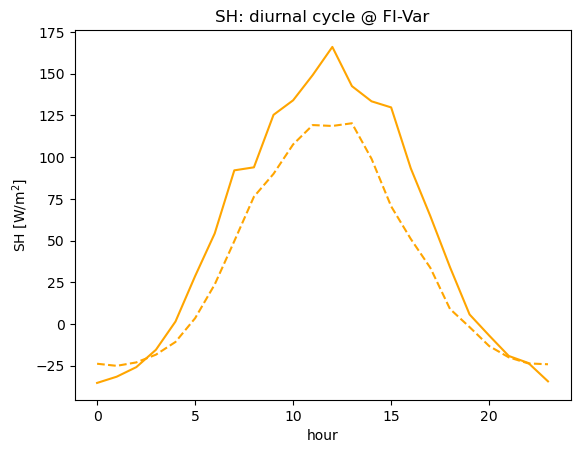

In [105]:
plt.plot(sh_obs_av[6,:,60],color=colorpal[6])
plt.plot(sh_mod_av[6,:,60],"--",color=colorpal[6])
plt.xlabel("hour")
plt.ylabel(r"SH [W/m$^2$]")
plt.title("SH: diurnal cycle @ FI-Var")

### Plots of validation metrics at selected station

In [106]:
idx=60 #select a station from metadata file

Text(0.5, 1.0, 'SH: average seasonal and diurnal cycle (obs) [$W/m^2$]')

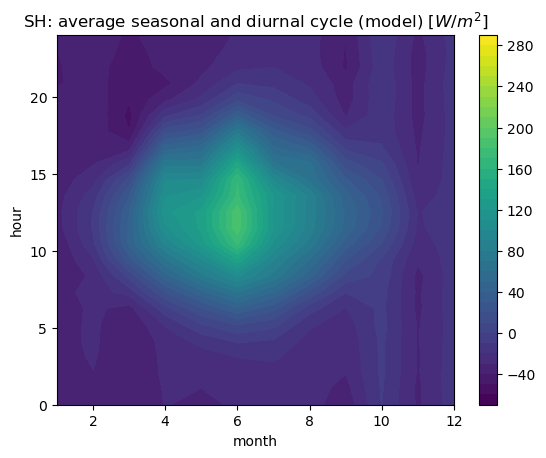

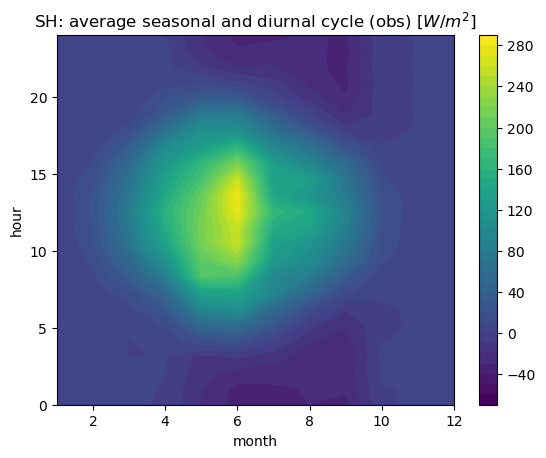

In [142]:
#sh model
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(sh_mod_av[:,:,idx]),levels=np.linspace(-70,290,37))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: average seasonal and diurnal cycle (model) [$W/m^2$]")

#sh obs
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(sh_obs_av[:,:,idx]),levels=np.linspace(-70,290,37))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: average seasonal and diurnal cycle (obs) [$W/m^2$]")

Text(0.5, 1.0, 'SH: linear correlation (model vs obs)')

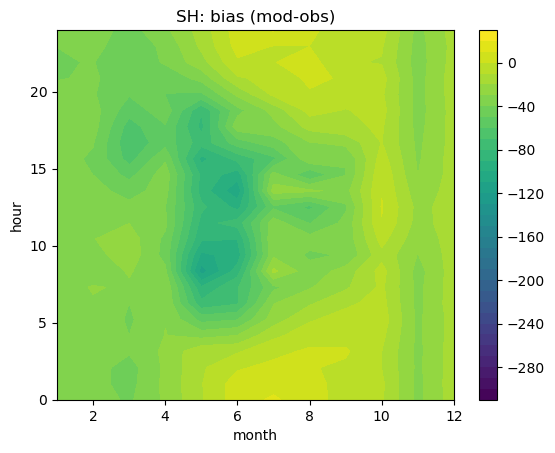

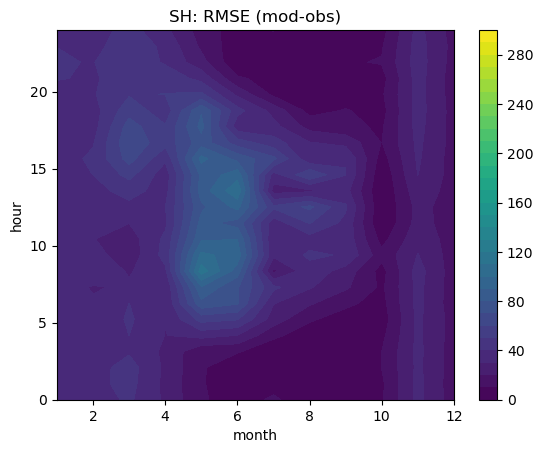

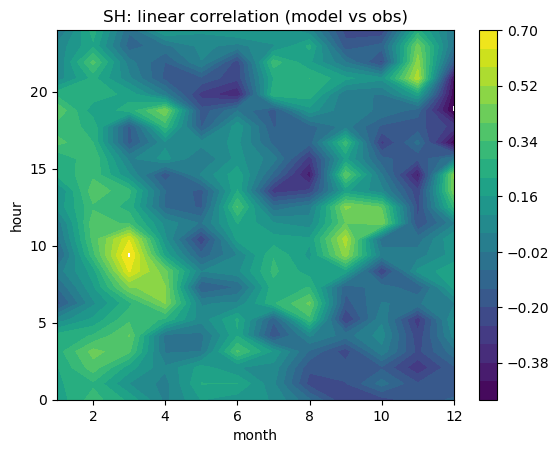

In [139]:
#sh bias
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(sh_bias[:,:,idx]),levels=np.linspace(-310,30,35))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: bias (mod-obs)")

#sh rmse
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(sh_rmse[:,:,idx]),levels=np.linspace(0,300,31))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: RMSE (mod-obs)")

#sh cors
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(sh_cors[:,:,idx]),levels=np.linspace(-0.5,0.7,21))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: linear correlation (model vs obs)")

**correlation over average values:** <br>
even if the correlation per month and hour (plot above) is relatively low, the correlation of the averaged values itself is really high (below), so the average diurnal and seasonal cycle is well correlated

In [143]:
np.corrcoef(np.concatenate(sh_mod_av[:,:,idx]),np.concatenate(sh_obs_av[:,:,idx]))

array([[1.        , 0.95536472],
       [0.95536472, 1.        ]])

### Plots of validation metrics (average over several/all stations)

In [114]:
idxx=range(nstations) #select which stations shall be considered in averaging

Text(0.5, 1.0, 'SH: average seasonal and diurnal cycle (obs) [$W/m^2$]')

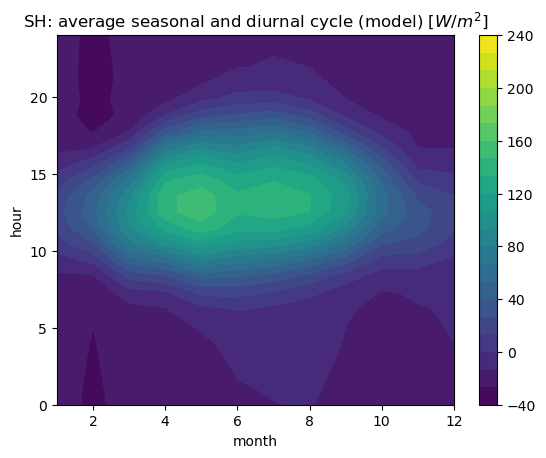

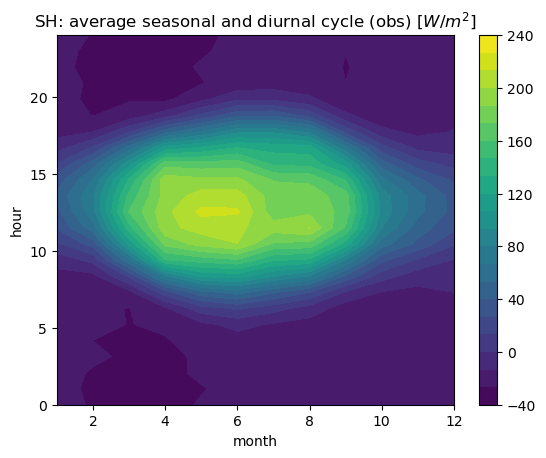

In [132]:
#sh model
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(average_stations(sh_mod_av[:,:,idxx])),levels=np.linspace(-40,240,22))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: average seasonal and diurnal cycle (model) [$W/m^2$]")

#sh obs
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(average_stations(sh_obs_av[:,:,idxx])),levels=np.linspace(-40,240,22))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: average seasonal and diurnal cycle (obs) [$W/m^2$]")

Text(0.5, 1.0, 'SH: linear correlation (model vs obs)')

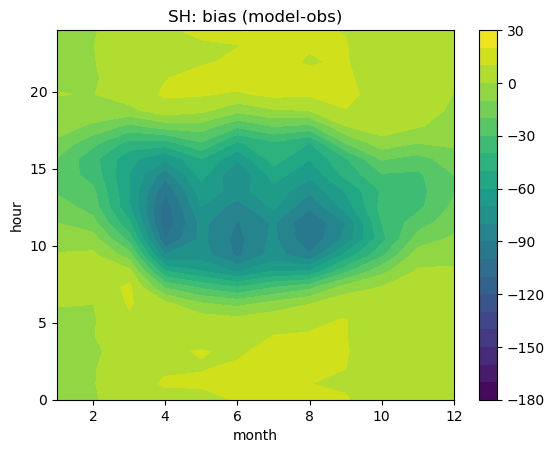

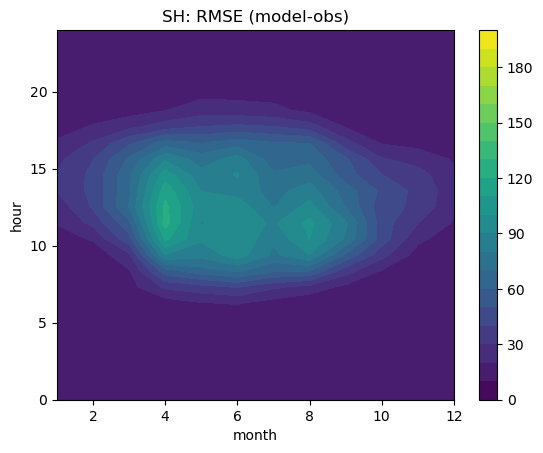

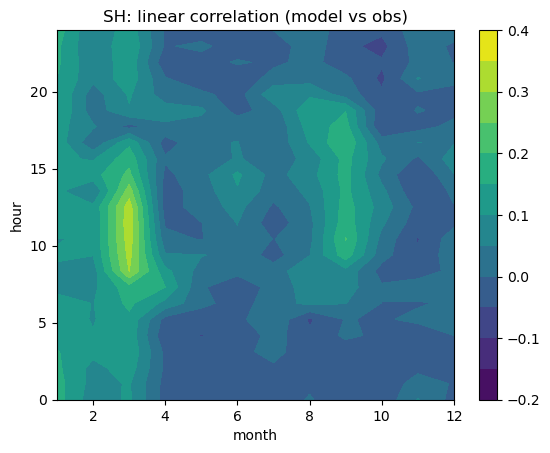

In [147]:
#sh bias
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(average_stations(sh_bias[:,:,idxx])),levels=np.linspace(-180,30,22))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: bias (model-obs)")

#sh rmse
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(average_stations(sh_rmse[:,:,idxx])),levels=np.linspace(0,200,21))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: RMSE (model-obs)")

#sh cors
fig,ax = plt.subplots()
cf=ax.contourf(np.linspace(1,12,12),np.linspace(0,24,24),np.transpose(average_stations(sh_cors[:,:,idxx])),levels=np.linspace(-0.2,0.4,13))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"SH: linear correlation (model vs obs)")

In [146]:
np.corrcoef(np.concatenate(average_stations(sh_mod_av[:,:,idxx])),np.concatenate(average_stations(sh_obs_av[:,:,idxx])))

array([[1.       , 0.9807505],
       [0.9807505, 1.       ]])

same as for single station: correlation of average values is high

## Short summary of validation plots
- model underestimates amplitude of diurnal and seasonal cycle (i.e., to low fluxes during day/summer and to high fluxes during night/winter) -> results in negative bias during day/summer and positive bias during night/winter; high RMSE during day/summer 
- correlation of a timeseries per hour and month is really low (= anomaly correlation coefficient), but the correlation of the averaged values is really high